In [ ]:
# Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings(action = 'ignore')

# Label Encoding
from sklearn.preprocessing import LabelEncoder

from collections import OrderedDict


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
    
from sklearn.metrics import accuracy_score              # to check accuracy import its library first
from sklearn.model_selection import cross_val_score   # to do cross validation import the library first
from sklearn.model_selection import train_test_split    #train/test split library
from sklearn.model_selection import StratifiedKFold     # for stratified k fold

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report

In [ ]:
# Import data

In [ ]:
data = pd.read_excel('/content/Rocket_Loans.xlsx')

In [ ]:
# Back up of data

In [ ]:
data_backup = data

In [ ]:
data

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,28,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,33,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,39,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,47,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_ID                      614 non-null    object 
 1   Sex                          601 non-null    object 
 2   Age                          614 non-null    int64  
 3   Married                      611 non-null    object 
 4   No. of People in the Family  599 non-null    object 
 5   Qualification                614 non-null    object 
 6   Self_Employed                582 non-null    object 
 7   Loan_Bearer_Income           614 non-null    int64  
 8   Loan_Cobearer_Income         614 non-null    float64
 9   Amount Disbursed             593 non-null    float64
 10  Loan_Tenure                  600 non-null    float64
 11  Credit_Score                 564 non-null    float64
 12  Location_type                614 non-null    object 
 13  Loan_Status         

In [ ]:
# Checking duplicate values

In [ ]:


data.duplicated().value_counts()

False    614
dtype: int64

In [ ]:
# Checking Missing Values

In [ ]:
data.isnull().sum()

Loan_ID                         0
Sex                            13
Age                             0
Married                         3
No. of People in the Family    15
Qualification                   0
Self_Employed                  32
Loan_Bearer_Income              0
Loan_Cobearer_Income            0
Amount Disbursed               21
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

In [ ]:
# Treating Missing Values

In [ ]:
for x in data:
    if (np.dtype(data[x]) == 'object'):
      data[x] = np.where(data[x].isnull(),data[x].mode(),data[x])
    elif (np.dtype(data[x]) == 'float64' or (np.dtype(data[x])) == 'int64' ):
      data[x] = np.where(data[x].isnull(),data[x].mean(),data[x])

      

 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_ID                      614 non-null    object 
 1   Sex                          614 non-null    object 
 2   Age                          614 non-null    float64
 3   Married                      614 non-null    object 
 4   No. of People in the Family  614 non-null    object 
 5   Qualification                614 non-null    object 
 6   Self_Employed                614 non-null    object 
 7   Loan_Bearer_Income           614 non-null    float64
 8   Loan_Cobearer_Income         614 non-null    float64
 9   Amount Disbursed             614 non-null    float64
 10  Loan_Tenure                  614 non-null    float64
 11  Credit_Score                 614 non-null    float64
 12  Location_type                614 non-null    object 
 13  Loan_Status         

In [ ]:
sns.countplot(data['Sex'],hue = data['Loan_Status'])
pd.crosstab(data['Sex'],data['Loan_Status'])

NameError: ignored

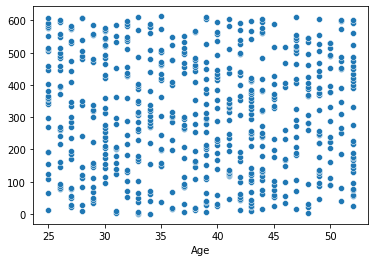

In [ ]:
sns.scatterplot(data['Age'],y = np.arange(0,614))

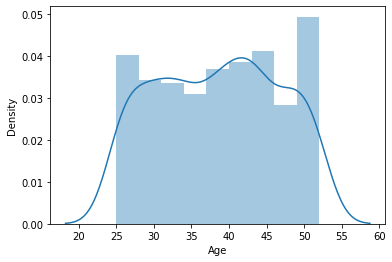

In [ ]:
sns.distplot(data['Age'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


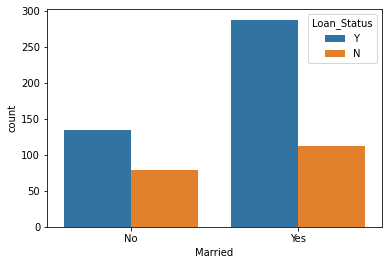

In [ ]:
sns.countplot(data['Married'],hue = data['Loan_Status'])
pd.crosstab(data['Married'],data['Loan_Status'])

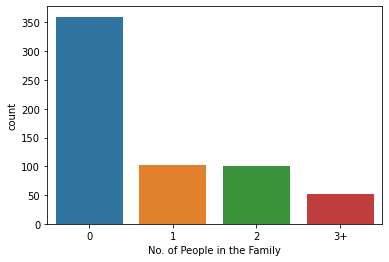

In [ ]:
sns.countplot(data['No. of People in the Family'])

Loan_Status,N,Y
No. of People in the Family,,
0,113,247
1,36,66
2,25,76
3+,18,33


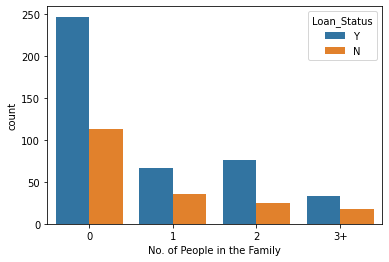

In [ ]:
sns.countplot(data['No. of People in the Family'],hue = data['Loan_Status'])
pd.crosstab(data['No. of People in the Family'],data['Loan_Status'])

Loan_Status,N,Y
Qualification,,
Graduate,140,340
Not Graduate,52,82


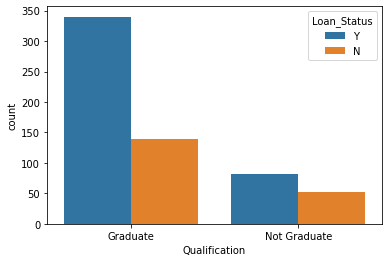

In [ ]:
sns.countplot(data['Qualification'],hue = data['Loan_Status'])
pd.crosstab(data['Qualification'],data['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


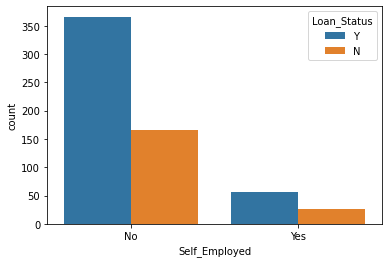

In [ ]:
sns.countplot(data['Self_Employed'],hue = data['Loan_Status'])
pd.crosstab(data['Self_Employed'],data['Loan_Status'])

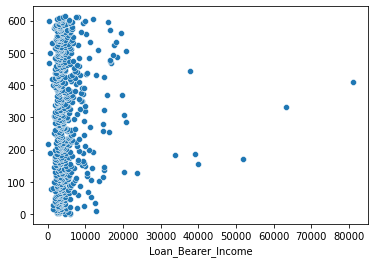

In [ ]:
sns.scatterplot(data['Loan_Bearer_Income'] , y = np.arange(0,614))

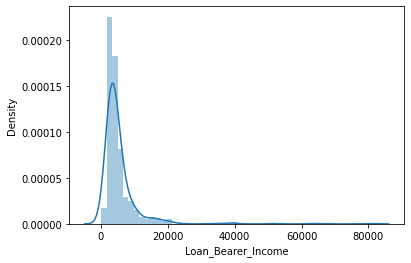

In [ ]:
sns.distplot(data['Loan_Bearer_Income'])

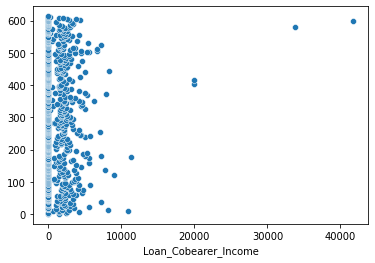

In [ ]:
sns.scatterplot(data['Loan_Cobearer_Income'] , y = np.arange(0,614))

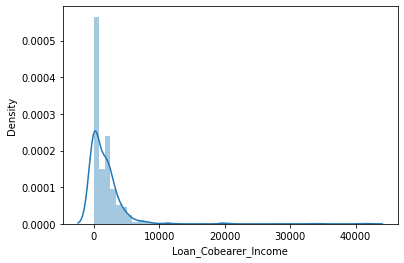

In [ ]:
sns.distplot(data['Loan_Cobearer_Income'])

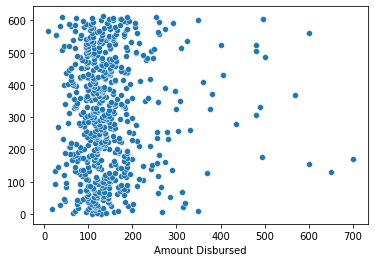

In [ ]:
sns.scatterplot(x = data['Amount Disbursed'], y = np.arange(0,614))

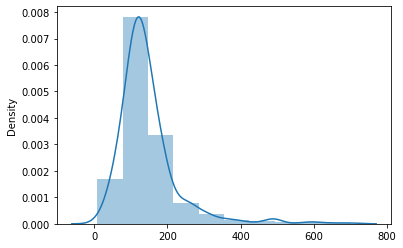

In [ ]:
sns.distplot(x = data['Amount Disbursed'],bins = 10)

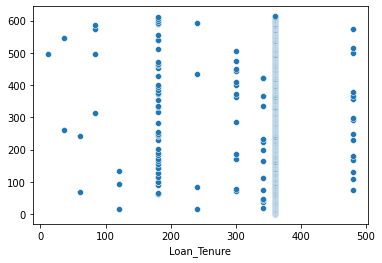

In [ ]:
sns.scatterplot(data['Loan_Tenure'],y = np.arange(0,614))

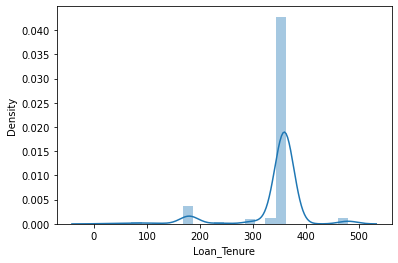

In [ ]:
sns.distplot(data['Loan_Tenure'])

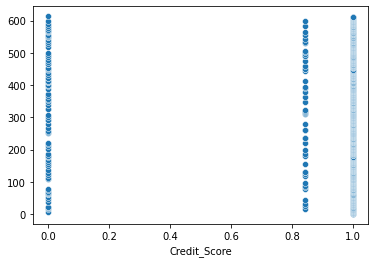

In [ ]:
sns.scatterplot(data['Credit_Score'],y = np.arange(0,614))

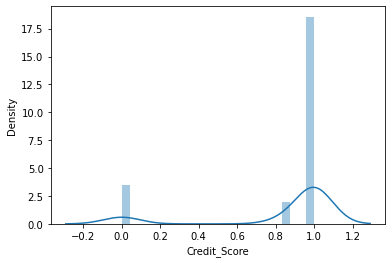

In [ ]:
sns.distplot(data['Credit_Score'])

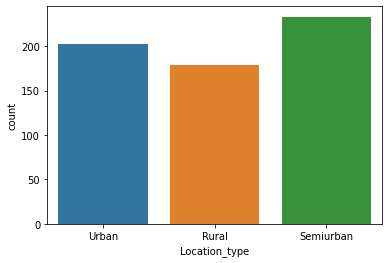

In [ ]:
sns.countplot(data['Location_type'])

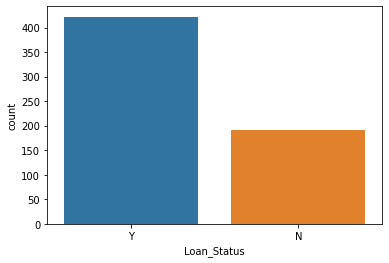

In [ ]:
sns.countplot(data['Loan_Status'])

In [ ]:
# Checking for data imbalancing

In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Imbalanced data

In [ ]:
# Treatment of imbalanced Data

In [ ]:
data.drop('Loan_ID',axis = 1,inplace = True)

In [ ]:
# Label Encoding

In [ ]:
data['No. of People in the Family'] = np.where(data['No. of People in the Family'] == '3+','More than 3',data['No. of People in the Family'])

In [ ]:
data['No. of People in the Family'].value_counts()

0              360
1              102
2              101
More than 3     51
Name: No. of People in the Family, dtype: int64

In [ ]:
to_encode_people = {0:0,1:1,2:2,'More than 3':3}
data['No. of People in the Family'] = data['No. of People in the Family'].map(to_encode_people)

In [ ]:
le = LabelEncoder()
col_to_encode = ['Sex','Married','Qualification','Self_Employed','Location_type','Loan_Status']
data[col_to_encode] = data[col_to_encode].apply(le.fit_transform)




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          614 non-null    int64  
 1   Age                          614 non-null    float64
 2   Married                      614 non-null    int64  
 3   No. of People in the Family  614 non-null    int64  
 4   Qualification                614 non-null    int64  
 5   Self_Employed                614 non-null    int64  
 6   Loan_Bearer_Income           614 non-null    float64
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             614 non-null    float64
 9   Loan_Tenure                  614 non-null    float64
 10  Credit_Score                 614 non-null    float64
 11  Location_type                614 non-null    int64  
 12  Loan_Status                  614 non-null    int64  
dtypes: float64(6), int64

In [ ]:
# Custom Summary

In [ ]:
catg = data[{'Sex','Married','No. of People in the Family','Qualification','Self_Employed','Location_type','Credit_Score'}]

In [ ]:
catg

,Self_Employed,Location_type,Credit_Score,Married,Qualification,Sex,No. of People in the Family
0,0,2,1.0,0,0,1,0
1,0,0,1.0,1,0,1,1
2,1,2,1.0,1,0,1,0
3,0,2,1.0,1,1,1,0
4,0,2,1.0,0,0,1,0
...,...,...,...,...,...,...,...
609,0,0,1.0,0,0,0,0
610,0,0,1.0,1,0,1,3
611,0,2,1.0,1,0,1,1
612,0,2,1.0,1,0,1,2


In [ ]:
data.drop(['Qualification',	'Sex',	'Married',	'Location_type',	'Credit_Score','No. of People in the Family',	'Self_Employed'],axis = 1,inplace = True)

In [ ]:
target = data['Loan_Status']

In [ ]:
data.drop('Loan_Status',axis = 1,inplace = True)

In [ ]:

def custom_summary(df): 
    
    
    result = []   # Creating an empty list named result
   
    
    # Iterating all the columns in the data for descriptive statistics
    for col in df.columns:
        stats = OrderedDict({'Feature Name':col,
                             'Count':df[col].count(),
                             'Minimum':df[col].min(),
                             'Quartile 1':df[col].quantile(0.25),
                              'Mean':data[col].mean(),
                             'Median':df[col].median(),
                             'Quartile 3':df[col].quantile(0.75),
                             'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                             'Maximum':df[col].max(),
                             'Variance':df[col].var(),
                             'Standard Deviation':df[col].std(),
                             'Kurtosis':df[col].kurt(),
                            })
        # Custom Comment for identifying Skewness
        if df[col].skew() < -1:
            sk_label = 'Highly Negatively Skewed'
        elif -1 <= df[col].skew() <-0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() < 0:
            sk_label = 'Fairly Symmetric Negatively Skewed'
        elif 0 <= df[col].skew() < 0.5:
            sk_label = 'Fairly Symmetric Positively Skewed'
        elif 0.5 <= df[col].skew() < 1:
            sk_label = 'Moderately Positively Skewed'
        elif df[col].skew() > 1:
            sk_label = 'Highly Positively Skewed'
        else:
            sk_label='Error'
        stats['Skewness Comment'] = sk_label

        # Custom Comment for identifying Outliers
        
        up_limit = stats[ 'Quartile 3'] + 1.5*stats['IQR']
        low_limit = stats[ 'Quartile 1'] - 1.5*stats['IQR']
        print(up_limit)
        print(low_limit)

       # outliers =  data.loc[(df[col] < low_limit) | (df[col] >up_limit),col]
        if len([x for x in df[col] if x < low_limit or x > up_limit]) >0: # x is a set here if any column has outlier it will store in it x[2,3,5] like that and len is used to chk the value of x if it  will be more than 0 we can say there is outlier 
          outlier_comment = 'has outlier'
        else:
          outlier_comment = 'no outlier'
            
        stats['outlier_comment'] = outlier_comment
        result.append(stats)
    summary_df = pd.DataFrame(data = result)
    return summary_df


In [ ]:
custom_summary(data)

64.5
12.5
10171.25
-1498.75
5743.125
-3445.875
261.5
3.5
360.0
360.0


,Feature Name,Count,Minimum,Quartile 1,Mean,Median,Quartile 3,IQR,Maximum,Variance,Standard Deviation,Kurtosis,Skewness Comment,outlier_comment
0,Age,614,25.0,32.00,38.469055,39.0,45.00,13.00,52.0,6.601128e+01,8.124732,-1.163663,Fairly Symmetric Negatively Skewed,no outlier
1,Loan_Bearer_Income,614,150.0,2877.50,5403.459283,3812.5,5795.00,2917.50,81000.0,3.732039e+07,6109.041673,60.540676,Highly Positively Skewed,has outlier
2,Loan_Cobearer_Income,614,0.0,0.00,1621.245798,1188.5,2297.25,2297.25,41667.0,8.562930e+06,2926.248369,84.956384,Highly Positively Skewed,has outlier
3,Amount Disbursed,614,9.0,100.25,146.347386,128.5,164.75,64.50,700.0,7.064699e+03,84.051763,10.895526,Highly Positively Skewed,has outlier
4,Loan_Tenure,614,12.0,360.00,342.000000,360.0,360.00,0.00,480.0,4.143817e+03,64.372489,6.897995,Highly Negatively Skewed,has outlier


In [ ]:
def replace_outlier(data,col,method = 'quartile',strategy='median'):
    
    col_data = data[col]
   
    
    # Using method 1 : Quartile
    
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3-q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
    
    # Using method 2 : Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_std = data[col].std()
        limit = 2 *col_std 
        up_limit = col_mean + limit
        low_limit = col_mean - limit
    
    else :
        print("Pass a correct method")

    # Displaying the outliers
    
    outliers =  data.loc[(col_data < lower_limit) | (col_data >upper_limit),col]
    outliers_percentage = round(len(outliers) / len(data),2)
        
    if len(outliers) == 0:
        print(f'The {col} has no outlier')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print(f'Outlier percentage : {outliers_percentage}')
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display ( data.loc[(col_data < lower_limit) | (col_data >upper_limit),col])
        
        
        # Replacing outliers
        # Using strategy 1 that is 'median'
        
    if strategy == 'median':
        data.loc[(col_data < lower_limit) | (col_data >upper_limit),col] = data[col].median()
        
        
    # Using strategy 2 that is 'mean'
        
    elif strategy == 'mean':
        data.loc[(col_data < low_limit )| (col_data >up_limit),col] =data[col].mean()
        
    else:
        print('Pass a correct Strategy')
            
    return data
            
            
    
          

        
    

In [ ]:
for x in data.columns:
  replace_outlier(data,x)

The Age has no outlier
The Loan_Bearer_Income has no outlier
The Loan_Cobearer_Income has no outlier
The Amount Disbursed has no outlier
The Loan_Tenure has no outlier


In [ ]:
custom_summary(data)

64.5
12.5
5081.5
1697.5
5207.5
-3124.5
209.86846543001684
40.478920741989896
360.0
360.0


,Feature Name,Count,Minimum,Quartile 1,Mean,Median,Quartile 3,IQR,Maximum,Variance,Standard Deviation,Kurtosis,Skewness Comment,outlier_comment
0,Age,614,25.0,32.0,38.469055,39.0000,45.000000,13.000000,52.0,6.601128e+01,8.124732,-1.163663,Fairly Symmetric Negatively Skewed,no outlier
1,Loan_Bearer_Income,614,1759.0,2966.5,3471.130293,3812.1250,3812.500000,846.000000,5050.0,5.478445e+05,740.165187,-0.334609,Fairly Symmetric Negatively Skewed,no outlier
2,Loan_Cobearer_Income,614,0.0,0.0,1215.402761,1169.6875,2083.000000,2083.000000,5064.0,1.776283e+06,1332.772543,-0.234180,Moderately Positively Skewed,no outlier
3,Amount Disbursed,614,42.0,104.0,125.118152,128.2500,146.347386,42.347386,209.0,1.178275e+03,34.326016,-0.105482,Fairly Symmetric Positively Skewed,no outlier
4,Loan_Tenure,614,360.0,360.0,360.000000,360.0000,360.000000,0.000000,360.0,0.000000e+00,0.000000,0.000000,Fairly Symmetric Positively Skewed,no outlier


In [ ]:
# q3 = data['Loan_Bearer_Income'].quantile(0.75)
# q1 = data['Loan_Bearer_Income'].quantile(0.25)
# IQR = q3 - q1
# lower_limit = q1-(IQR*1.5)
# print(lower_limit) 
# upper_limit = q3 +(1.5*IQR)
# print(upper_limit)
# median = data['Loan_Bearer_Income'].median()
# print(median)
  
#  # Displaying the outliers
    
# outliers =  data.loc[(data['Loan_Bearer_Income'] < lower_limit) | (data['Loan_Bearer_Income'] >upper_limit),'Loan_Bearer_Income']
# outliers_percentage = round(len(outliers) / len(data),2)
        
# if len(outliers) == 0:
#   print(f'The Loan has no outlier')
# else:
#   print(f'The Loan has {len(outliers)} outliers')
#   print(f'Outlier percentage : {outliers_percentage}')
#   display ( data.loc[(data['Loan_Bearer_Income'] < lower_limit) | (data['Loan_Bearer_Income'] >upper_limit),'Loan_Bearer_Income'])

#   # Replacing outliers
# data['Loan_Bearer_Income'] = np.where(data['Loan_Bearer_Income'] >upper_limit ,median,data['Loan_Bearer_Income'])
# data['Loan_Bearer_Income'] = np.where(data['Loan_Bearer_Income'] < lower_limit,median,data['Loan_Bearer_Income'])
# print('XXXXXXXXXXXXXX D O N E XXXXXXXXXXXXX')


In [ ]:
data

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure
0,33.0,3812.125,0.0,108.00,360.0
1,34.0,4583.000,1508.0,128.00,360.0
2,31.0,3000.000,0.0,66.00,360.0
3,33.0,2583.000,2358.0,120.00,360.0
4,48.0,3812.125,0.0,141.00,360.0
...,...,...,...,...,...
609,28.0,2900.000,0.0,71.00,360.0
610,33.0,4106.000,0.0,128.25,360.0
611,39.0,3812.250,240.0,128.25,360.0
612,47.0,3812.125,0.0,187.00,360.0


In [ ]:
data = data.join(catg)

In [ ]:
data = data.join(target)

In [ ]:
data

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Self_Employed,Location_type,Credit_Score,Married,Qualification,Sex,No. of People in the Family,Loan_Status
0,33.0,3812.125,0.0,108.00,360.0,0,2,1.0,0,0,1,0,1
1,34.0,4583.000,1508.0,128.00,360.0,0,0,1.0,1,0,1,1,0
2,31.0,3000.000,0.0,66.00,360.0,1,2,1.0,1,0,1,0,1
3,33.0,2583.000,2358.0,120.00,360.0,0,2,1.0,1,1,1,0,1
4,48.0,3812.125,0.0,141.00,360.0,0,2,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,28.0,2900.000,0.0,71.00,360.0,0,0,1.0,0,0,0,0,1
610,33.0,4106.000,0.0,128.25,360.0,0,0,1.0,1,0,1,3,1
611,39.0,3812.250,240.0,128.25,360.0,0,2,1.0,1,0,1,1,1
612,47.0,3812.125,0.0,187.00,360.0,0,2,1.0,1,0,1,2,1


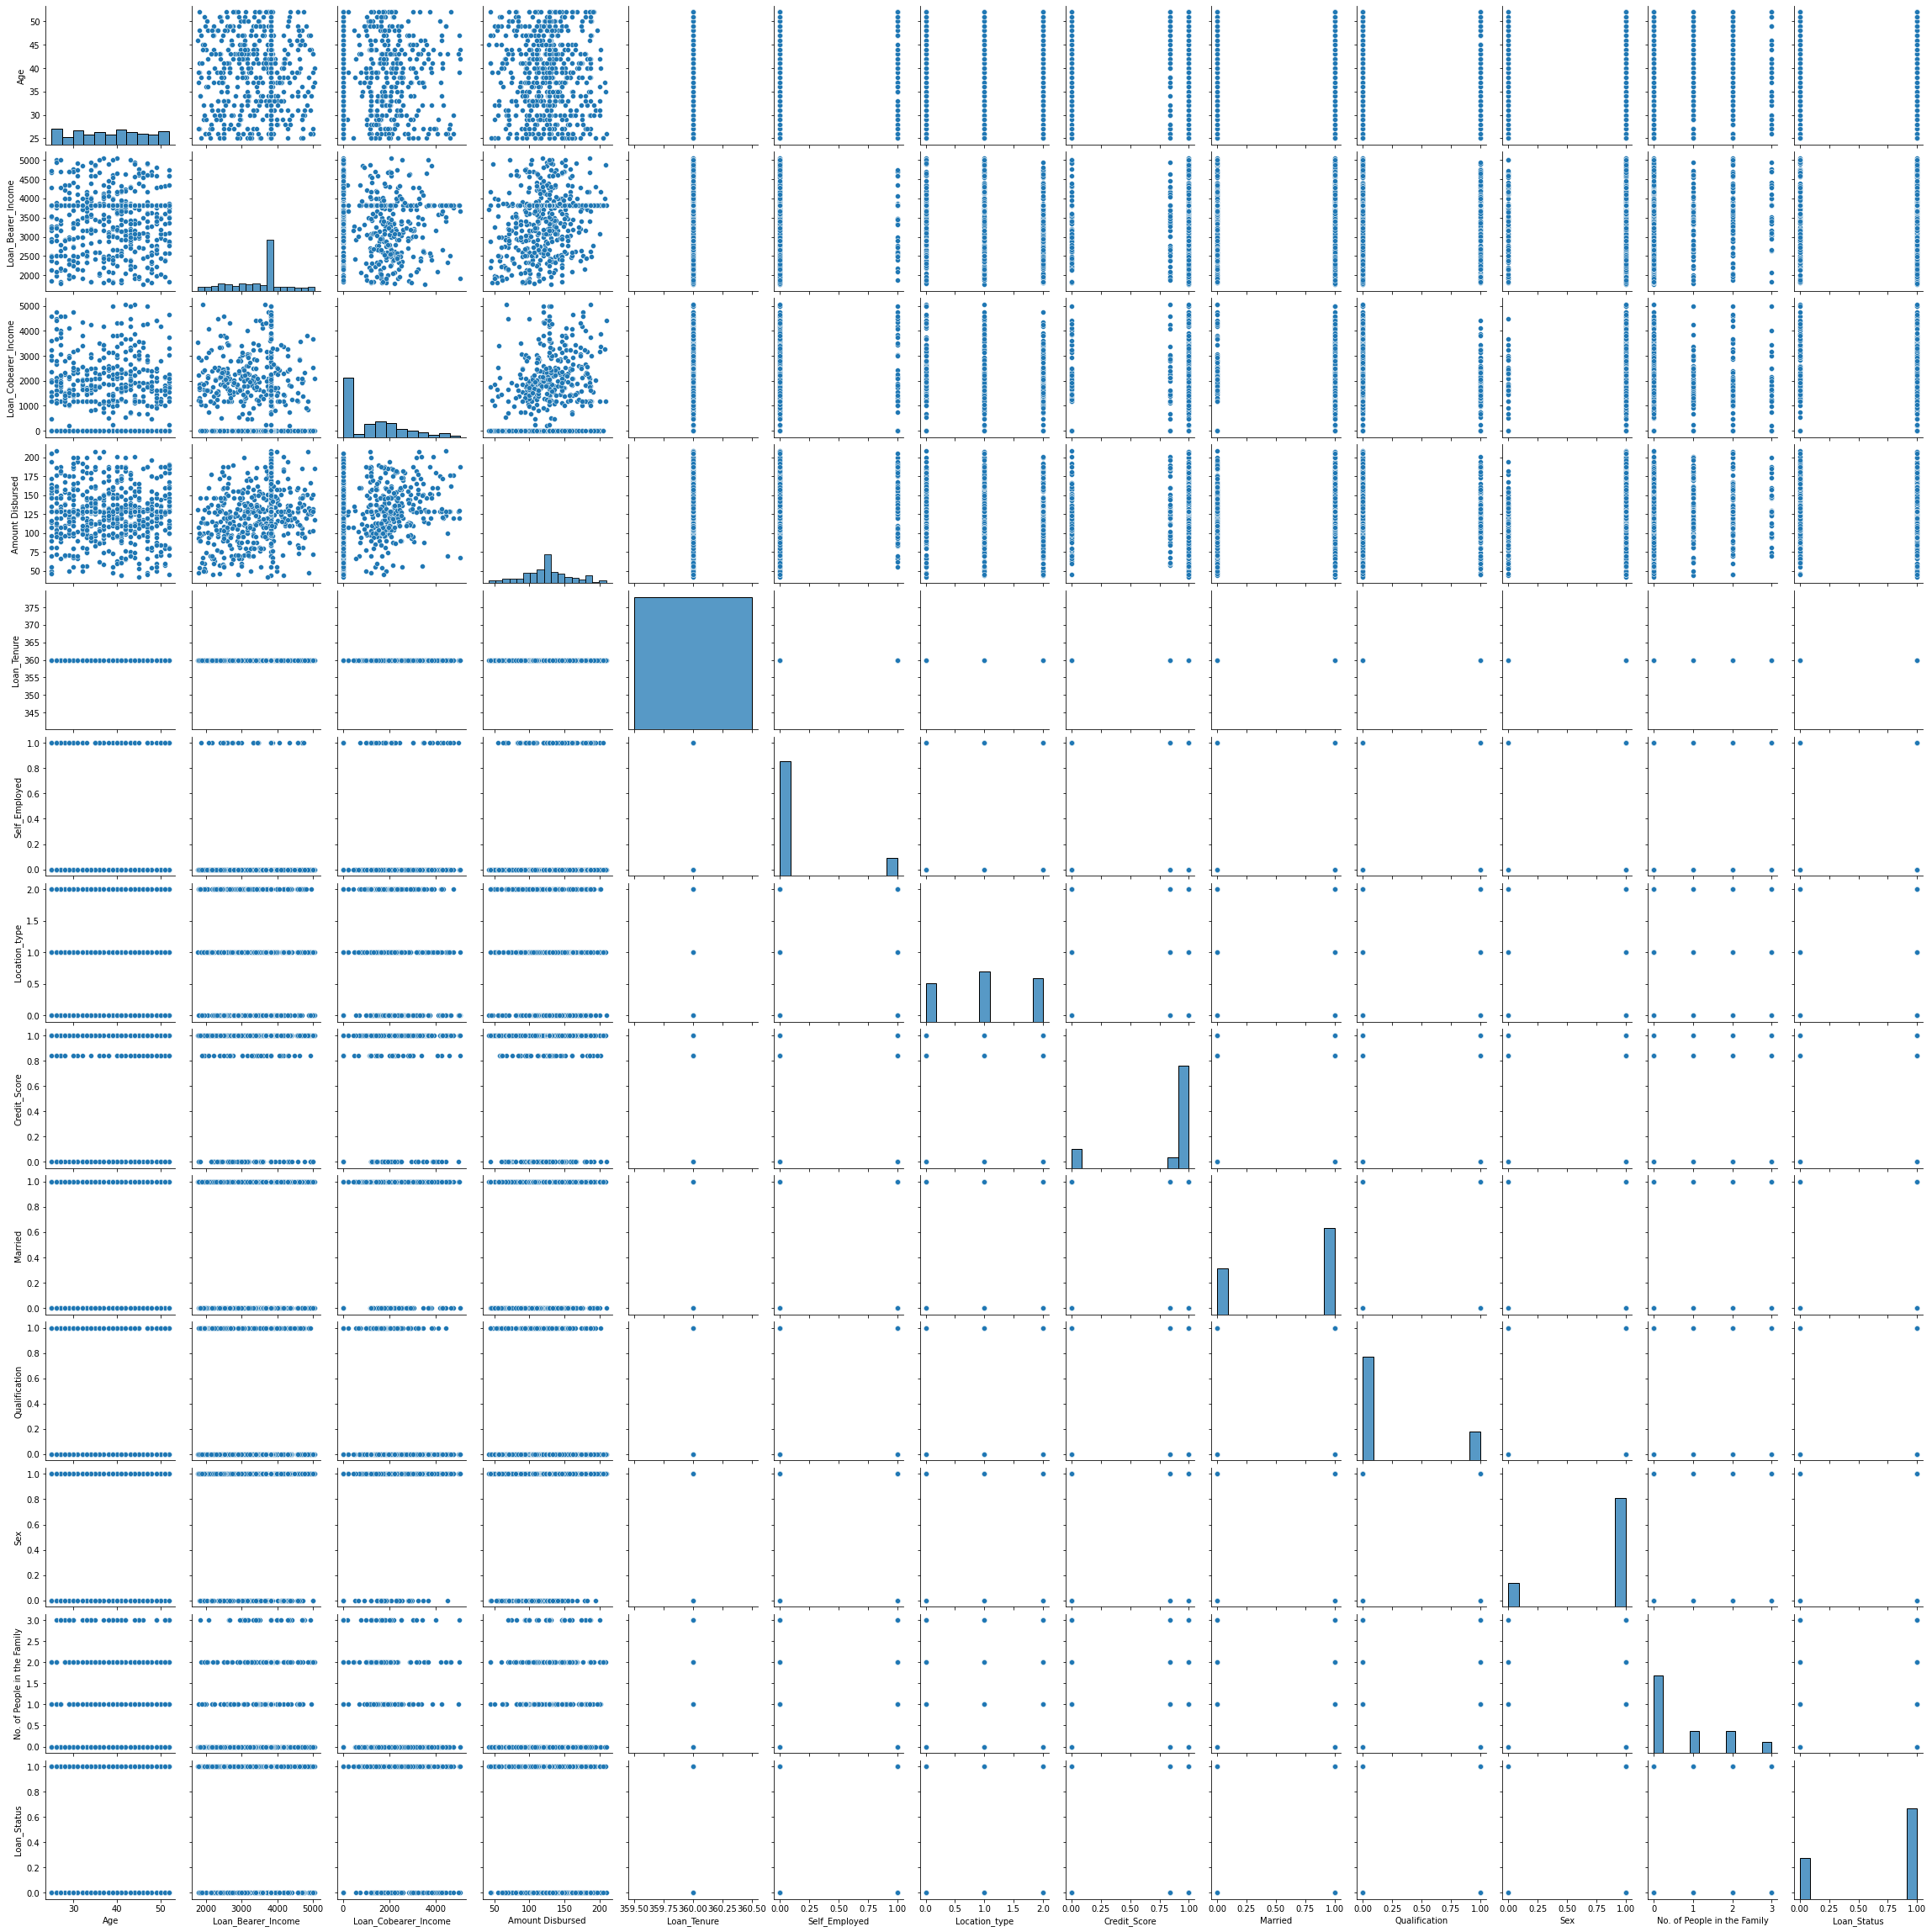

In [ ]:
sns.pairplot(data)

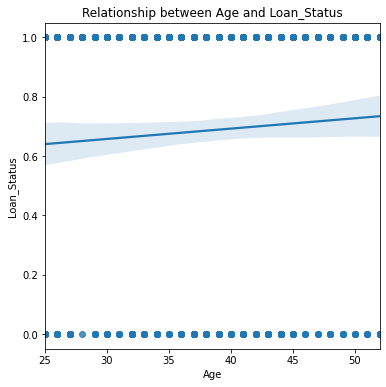

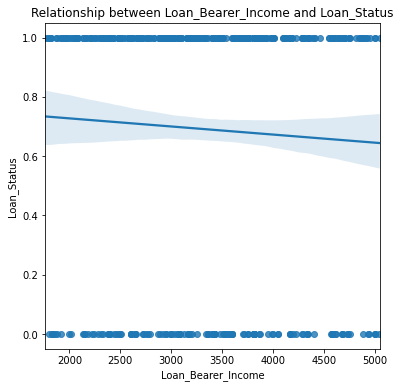

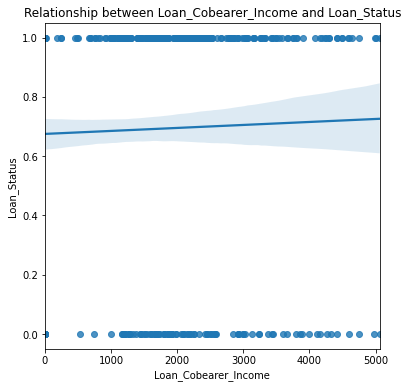

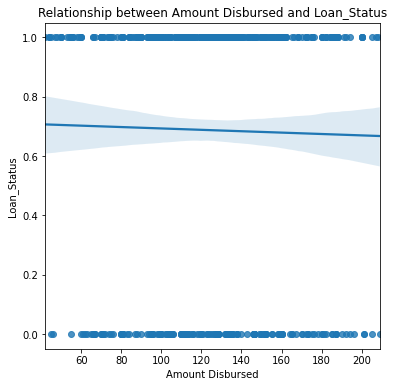

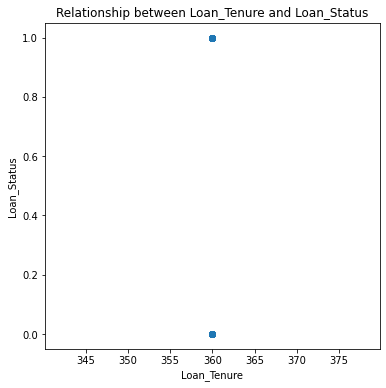

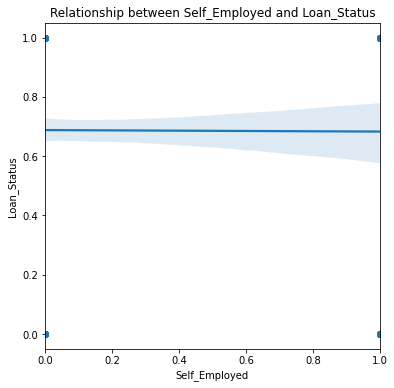

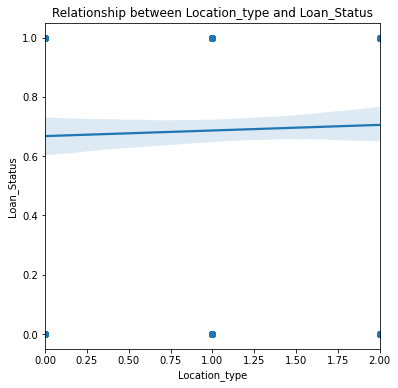

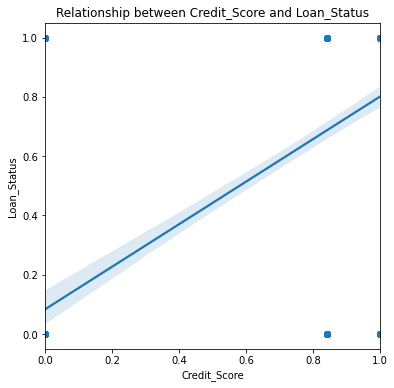

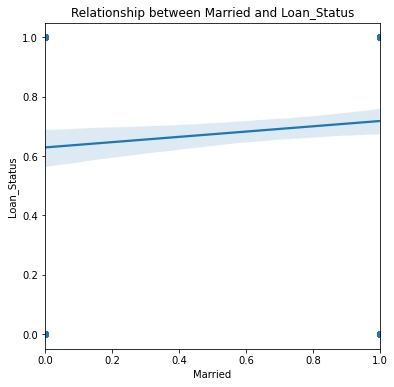

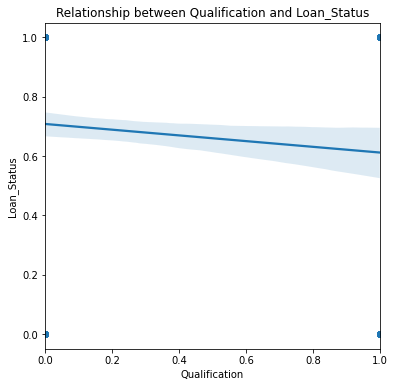

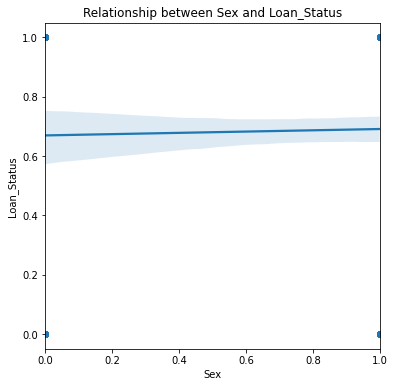

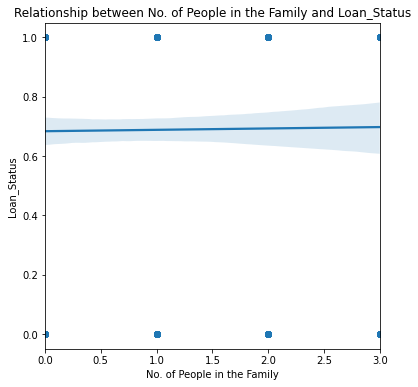

In [ ]:
# multivariate data analysis using regression plots
for col in data.columns:
    if col!= 'Loan_Status':
        f,ax1 = plt.subplots(figsize=(6,6))
        sns.regplot(x=data[col],y = data['Loan_Status'],ax = ax1).set_title(f'Relationship between {col} and Loan_Status')
    

In [ ]:
# Plotting heat map

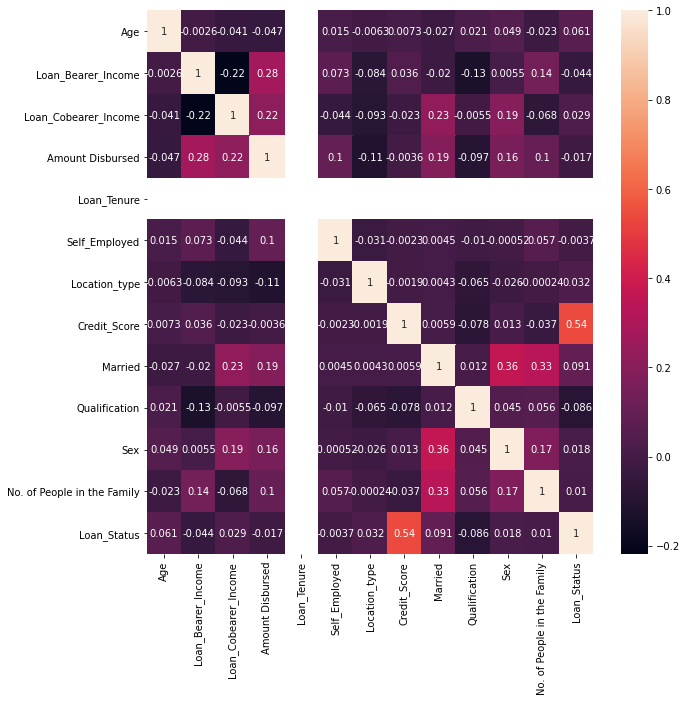

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True) # annot adds data value to each cell,the value is visible just bcz of this)

In [ ]:
# Correlation b/w Loan Bearer Income and Amount Disbursed which is not good because they both are independent variables

In [ ]:
# Correlation of each independent variable with target:

def corr_with_target(data,target_col):
    ind_var = data.drop([target_col],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[target_col].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index = ['Variables','Correlation']).T.sort_values('Correlation',ascending=False)
    return(result)
    


In [ ]:
corr_with_target(data,'Loan_Status')

,Variables,Correlation
7,Credit_Score,0.540483
8,Married,0.0914778
0,Age,0.0610433
6,Location_type,0.032112
2,Loan_Cobearer_Income,0.0289441
10,Sex,0.0179867
11,No. of People in the Family,0.0101185
5,Self_Employed,-0.00370044
3,Amount Disbursed,-0.0173501
1,Loan_Bearer_Income,-0.0435308


In [ ]:
# Credit Score(independent variable) is highly correlated with Loan Status(Dependent variable)

In [ ]:
# Credit Score is Highly correlated with loan status ,so we can say that credit score is important factor to predict Loan Status

In [ ]:
# VIF (Variance Inflation Factor):
# It is one of the most important method to find multicollinearity
# Formula for VIF = 1(1-rsquare)
# If the VIF value is more than 5 we say that the data is highly  multicolinear.

# Steps involved in VIF:
#1. Regress every independent variable with all other independent variables.
#2. Observe the rsquare values.
#3. Calculate the VIF using the formula.


In [ ]:
def vif_collinearity(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['vif_factor'] =[variance_inflation_factor(ind_var.values,i) for i in range(ind_var.shape[1])]
    result['features'] = ind_var.columns
    
    return(result.sort_values('vif_factor',ascending = False))

In [ ]:
vif_collinearity(data.drop('Loan_Status',axis=1))

,vif_factor,features
4,68.530323,Loan_Tenure
8,1.342521,Married
2,1.243983,Loan_Cobearer_Income
3,1.243937,Amount Disbursed
1,1.234086,Loan_Bearer_Income
10,1.192995,Sex
11,1.192160,No. of People in the Family
9,1.044535,Qualification
6,1.033951,Location_type
5,1.018161,Self_Employed


In [ ]:
# VIF of independent variable loan_tenure is greater than 5 which means it is highly correlated with other independent variables which is not good bcz we would not be able to see
# the individual effect of the independent variable on the dependent variable

In [ ]:
# Fixing Multicolinearity : To fix the multicolinearity,we can drop the Loan tenure as is not needed or it can be predicted by other independent variables in the dataset.

In [ ]:
data.drop('Loan_Tenure',axis = 1,inplace=True)

In [ ]:
data

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Self_Employed,Location_type,Credit_Score,Married,Qualification,Sex,No. of People in the Family,Loan_Status
0,33.0,3812.125,0.0,108.00,0,2,1.0,0,0,1,0,1
1,34.0,4583.000,1508.0,128.00,0,0,1.0,1,0,1,1,0
2,31.0,3000.000,0.0,66.00,1,2,1.0,1,0,1,0,1
3,33.0,2583.000,2358.0,120.00,0,2,1.0,1,1,1,0,1
4,48.0,3812.125,0.0,141.00,0,2,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,28.0,2900.000,0.0,71.00,0,0,1.0,0,0,0,0,1
610,33.0,4106.000,0.0,128.25,0,0,1.0,1,0,1,3,1
611,39.0,3812.250,240.0,128.25,0,2,1.0,1,0,1,1,1
612,47.0,3812.125,0.0,187.00,0,2,1.0,1,0,1,2,1


In [ ]:
def model_accuracy(x,y):

    from sklearn.model_selection import cross_val_score 
    from sklearn.metrics import f1_score,recall_score,precision_score
    # Making an object
    lr =LogisticRegression()
    knn = KNeighborsClassifier() # We can check the no.of neighbors by elbow method but firstly we will try it as by default
    dt = DecisionTreeClassifier()
    svc =SVC()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    adaboost = AdaBoostClassifier()
    xgb = XGBClassifier()
    
    
    # train/test split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
    
    
    # fit the model
    lr.fit(x_train,y_train)
    knn.fit(x_train,y_train)
    dt.fit(x_train,y_train)
    svc.fit(x_train,y_train)
    rf.fit(x_train,y_train)
    gb.fit(x_train,y_train)
    adaboost.fit(x_train,y_train)
    xgb.fit(x_train,y_train)
    
    
    # predict and check the accuracy and cross val score
    lr_pred = lr.predict(x_test)
    lr_accuracy = accuracy_score(y_test,lr_pred)
    cross_val_score_lr = cross_val_score(lr,x,y,cv=100)

    lr_pred_train = lr.predict(x_train)
    lr_accuracy_train = accuracy_score(y_train,lr_pred_train)

    lr_f1_score = f1_score(y_test,lr_pred)
    lr_precision = precision_score(y_test,lr_pred)
    lr_recall = recall_score(y_test,lr_pred)


    
    knn_pred = knn.predict(x_test)
    knn_accuracy = accuracy_score(y_test,knn_pred)
    cross_val_score_knn = cross_val_score(knn,x,y,cv=100)

    knn_pred_train = knn.predict(x_train)
    knn_accuracy_train = accuracy_score(y_train,knn_pred_train)

    knn_f1_score = f1_score(y_test,knn_pred)
    knn_precision = precision_score(y_test,knn_pred)
    knn_recall = recall_score(y_test,knn_pred)

        
    dt_pred = dt.predict(x_test)
    dt_accuracy = accuracy_score(y_test,dt_pred)
    cross_val_score_dt = cross_val_score(dt,x,y,cv=100)

    dt_pred_train = dt.predict(x_train)
    dt_accuracy_train = accuracy_score(y_train,dt_pred_train)

    dt_f1_score = f1_score(y_test,dt_pred)
    dt_precision = precision_score(y_test,dt_pred)
    dt_recall = recall_score(y_test,dt_pred)
    
         
    svc_pred = svc.predict(x_test)
    svc_accuracy = accuracy_score(y_test,svc_pred)
    cross_val_score_svc = cross_val_score(svc,x,y,cv=100)
    
    svc_pred_train = svc.predict(x_train)
    svc_accuracy_train = accuracy_score(y_train,svc_pred_train)

    svc_f1_score = f1_score(y_test,svc_pred)
    svc_precision = precision_score(y_test,svc_pred)
    svc_recall = recall_score(y_test,svc_pred)
    


    rf_pred = rf.predict(x_test)
    rf_accuracy = accuracy_score(y_test,rf_pred)
    cross_val_score_rf = cross_val_score(rf,x,y,cv=100)

    rf_pred_train = rf.predict(x_train)
    rf_accuracy_train = accuracy_score(y_train,rf_pred_train)

    rf_f1_score = f1_score(y_test,rf_pred)
    rf_precision = precision_score(y_test,rf_pred)
    rf_recall = recall_score(y_test,rf_pred)

    
         
    gb_pred = gb.predict(x_test)
    gb_accuracy = accuracy_score(y_test,gb_pred)
    cross_val_score_gb = cross_val_score(gb,x,y,cv=100)

    gb_pred_train = gb.predict(x_train)
    gb_accuracy_train = accuracy_score(y_train,gb_pred_train)

    gb_f1_score = f1_score(y_test,gb_pred)
    gb_precision = precision_score(y_test,gb_pred)
    gb_recall = recall_score(y_test,gb_pred)

    
    adaboost_pred = adaboost.predict(x_test)
    adaboost_accuracy = accuracy_score(y_test,adaboost_pred)
    cross_val_score_adaboost = cross_val_score(adaboost,x,y,cv=100)

    adaboost_pred_train = adaboost.predict(x_train)
    adaboost_accuracy_train = accuracy_score(y_train,adaboost_pred_train)

    adaboost_f1_score = f1_score(y_test,adaboost_pred)
    adaboost_precision = precision_score(y_test,adaboost_pred)
    adaboost_recall = recall_score(y_test,adaboost_pred)
    
    xgb_pred = xgb.predict(x_test)
    xgb_accuracy = accuracy_score(y_test,xgb_pred)
    cross_val_score_xgb = cross_val_score(xgb,x,y,cv=100)
    
    xgb_pred_train = xgb.predict(x_train)
    xgb_accuracy_train = accuracy_score(y_train,xgb_pred_train)

    xgb_f1_score = f1_score(y_test,xgb_pred)
    xgb_precision = precision_score(y_test,xgb_pred)
    xgb_recall = recall_score(y_test,xgb_pred)



     # Stratified K fol cross validation
    accuracy_list_lr = []
    accuracy_list_knn = []
    accuracy_list_dt = []
    accuracy_list_svc = []
    accuracy_list_rf = []
    accuracy_list_gb = []
    accuracy_list_adaboost =[]
    accuracy_list_xgb = []
    
        
    skf = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)    #n_splits = No. of splits or folds you want
                                      # random_state = 100 means hundred times it will shuffle
    
    for train_data,test_data in skf.split(x,y):     # Splitting entire x and y intro train and test data
        x1_train = x.iloc[train_data]          # assigning independent variables to xtrain from train data
        y1_train = y.iloc[train_data]          # assigning dependent variables to ytrain from train data
        x1_test =  x.iloc[test_data]           # assigning independent variables to xtrain from test data
        y1_test =  y.iloc[test_data]           # assigning dependent variables to ytrain from test data
        
        lr.fit(x1_train,y1_train)
        lr_predict = lr.predict(x1_test)
        sc_lr = accuracy_score(y1_test,lr_predict)
        accuracy_list_lr.append(sc_lr)
        
        knn.fit(x1_train,y1_train)
        knn_predict = knn.predict(x1_test)
        sc_knn = accuracy_score(y1_test,knn_predict)
        accuracy_list_knn.append(sc_knn)
        
        dt.fit(x1_train,y1_train)
        dt_predict = dt.predict(x1_test)
        sc_dt= accuracy_score(y1_test,dt_predict)
        accuracy_list_dt.append(sc_dt)
        
        svc.fit(x1_train,y1_train)
        svc_predict = svc.predict(x1_test)
        sc_svc= accuracy_score(y1_test,svc_predict)
        accuracy_list_svc.append(sc_svc)
        
        rf.fit(x1_train,y1_train)
        rf_predict = rf.predict(x1_test)
        sc_rf= accuracy_score(y1_test,rf_predict)
        accuracy_list_rf.append(sc_rf)
        
        gb.fit(x1_train,y1_train)
        gb_predict = gb.predict(x1_test)
        sc_gb= accuracy_score(y1_test,gb_predict)
        accuracy_list_gb.append(sc_gb)
        
        adaboost.fit(x1_train,y1_train)
        adaboost_predict = adaboost.predict(x1_test)
        sc_adaboost = accuracy_score(y1_test,adaboost_predict)
        accuracy_list_adaboost.append(sc_adaboost)
        
        xgb.fit(x1_train,y1_train)
        xgb_predict = xgb.predict(x1_test)
        sc_xgb = accuracy_score(y1_test,xgb_predict)
        accuracy_list_xgb.append(sc_xgb)
        
    model_name = ['Logistic','KNN','Decision Tree','SVC','Random Forest','Gradient Boosting','Adaboost','XGBoost']
    train_accuracy =[lr_accuracy_train,knn_accuracy_train,dt_accuracy_train,svc_accuracy_train,rf_accuracy_train,gb_accuracy_train,adaboost_accuracy_train,xgb_accuracy_train]
    accuracy = [lr_accuracy,knn_accuracy,dt_accuracy,svc_accuracy,rf_accuracy,gb_accuracy,adaboost_accuracy,xgb_accuracy]
    cross_val_score = [cross_val_score_lr.mean(),cross_val_score_knn.mean(),cross_val_score_dt.mean(),cross_val_score_svc.mean(),cross_val_score_rf.mean(),cross_val_score_gb.mean(),cross_val_score_adaboost.mean(),cross_val_score_xgb.mean()]
    accuracy_skf = [np.mean(accuracy_list_lr),np.mean(accuracy_list_knn),np.mean(accuracy_list_dt),np.mean(accuracy_list_svc),np.mean(accuracy_list_rf),np.mean(accuracy_list_gb),np.mean(accuracy_list_adaboost),np.mean(accuracy_list_xgb)]
    precision = [lr_precision,knn_precision,dt_precision,svc_precision,rf_precision,gb_precision,adaboost_precision,xgb_precision]
    recall =[lr_recall,knn_recall,dt_recall,svc_recall,rf_recall,gb_recall,adaboost_recall,xgb_recall]
    f1_score = [lr_f1_score,knn_f1_score,dt_f1_score,svc_f1_score,rf_f1_score,gb_f1_score,adaboost_f1_score,xgb_f1_score]

    result = pd.DataFrame([model_name,train_accuracy,accuracy,cross_val_score,accuracy_skf,precision,recall,f1_score],index = ['Model Name','Train Accuracy','Test_Accuracy','Cross_Val_Score','Stratified kfold Accuracy','Precision','Recall','F1 Score']).T
    
    return result
    
    
    

In [ ]:
y = data['Loan_Status']

In [ ]:

data.drop('Loan_Status',axis=1,inplace = True)

In [ ]:
x = data

In [ ]:
x

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Self_Employed,Location_type,Credit_Score,Married,Qualification,Sex,No. of People in the Family
0,33.0,3812.125,0.0,108.00,0,2,1.0,0,0,1,0
1,34.0,4583.000,1508.0,128.00,0,0,1.0,1,0,1,1
2,31.0,3000.000,0.0,66.00,1,2,1.0,1,0,1,0
3,33.0,2583.000,2358.0,120.00,0,2,1.0,1,1,1,0
4,48.0,3812.125,0.0,141.00,0,2,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
609,28.0,2900.000,0.0,71.00,0,0,1.0,0,0,0,0
610,33.0,4106.000,0.0,128.25,0,0,1.0,1,0,1,3
611,39.0,3812.250,240.0,128.25,0,2,1.0,1,0,1,1
612,47.0,3812.125,0.0,187.00,0,2,1.0,1,0,1,2


In [ ]:
model_accuracy(x,y)

,Model Name,Train Accuracy,Test_Accuracy,Cross_Val_Score,Stratified kfold Accuracy,Precision,Recall,F1 Score
0,Logistic,0.820513,0.783784,0.810238,0.806134,0.762821,0.97541,0.856115
1,KNN,0.722611,0.67027,0.622381,0.612163,0.707483,0.852459,0.773234
2,Decision Tree,1,0.718919,0.715476,0.69532,0.786885,0.786885,0.786885
3,SVC,0.699301,0.659459,0.686667,0.687308,0.659459,1,0.794788
4,Random Forest,1,0.740541,0.797143,0.789847,0.753425,0.901639,0.820896
5,Gradient Boosting,0.93007,0.767568,0.795238,0.79963,0.776224,0.909836,0.837736
6,Adaboost,0.86014,0.756757,0.798571,0.786621,0.754967,0.934426,0.835165
7,XGBoost,0.890443,0.762162,0.806429,0.802935,0.756579,0.942623,0.839416


In [ ]:
# Applying Model after treating imbalance data (using SMOTE)

def treated_imbalance_class_accuracy_SMOTE(x,y):
    result = []
    
    sm = SMOTE()
    # Train_Test Split:
    x1_train,x_test,y1_train,y_test = train_test_split(x,y)
    
    x_train,y_train = sm.fit_resample(x1_train,y1_train)
   
   
    
    #1. Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_test)
    lr_acc_score = accuracy_score(y_test,lr_pred)
    lr_f1_score = f1_score(y_test,lr_pred)
    lr_precision = precision_score(y_test,lr_pred)
    lr_recall = recall_score(y_test,lr_pred)
    
    

    
    #2. KNN
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred = knn.predict(x_test)
    knn_acc_score = accuracy_score(y_test,knn_pred)
    knn_f1_score = f1_score(y_test,knn_pred)
    knn_precision = precision_score(y_test,knn_pred)
    knn_recall = recall_score(y_test,knn_pred)

    #3. Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_acc_score = accuracy_score(y_test,dt_pred)
    dt_f1_score = f1_score(y_test,dt_pred)
    dt_precision = precision_score(y_test,dt_pred)
    dt_recall = recall_score(y_test,dt_pred)
    
    
    #4. Support Vector
    svm = SVC()
    svm.fit(x_train,y_train)
    svm_pred = svm.predict(x_test)
    svm_acc_score = accuracy_score(y_test,svm_pred)
    svm_f1_score = f1_score(y_test,svm_pred)
    svm_precision = precision_score(y_test,svm_pred)
    svm_recall = recall_score(y_test,svm_pred)
    
    #5. Random forest
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    rf_pred = rf.predict(x_test)
    rf_acc_score = accuracy_score(y_test,rf_pred)
    rf_f1_score = f1_score(y_test,rf_pred)
    rf_precision = precision_score(y_test,rf_pred)
    rf_recall = recall_score(y_test,rf_pred)

    
    #6. Gradient Boost
    gb = RandomForestClassifier()
    gb.fit(x_train,y_train)
    gb_pred = gb.predict(x_test)
    gb_acc_score = accuracy_score(y_test,gb_pred)
    gb_f1_score = f1_score(y_test,gb_pred)
    gb_precision = precision_score(y_test,gb_pred)
    gb_recall = recall_score(y_test,gb_pred)

    #7. AdaBoost
    adaboost = RandomForestClassifier()
    adaboost.fit(x_train,y_train)
    adaboost_pred = adaboost.predict(x_test)
    adaboost_acc_score = accuracy_score(y_test,adaboost_pred)
    adaboost_f1_score = f1_score(y_test,adaboost_pred)
    adaboost_precision = precision_score(y_test,adaboost_pred)
    adaboost_recall = recall_score(y_test,adaboost_pred)

    #7. XGBoost
    xg = RandomForestClassifier()
    xg.fit(x_train,y_train)
    xg_pred = xg.predict(x_test)
    xg_acc_score = accuracy_score(y_test,xg_pred)
    xg_f1_score = f1_score(y_test,xg_pred)
    xg_precision = precision_score(y_test,xg_pred)
    xg_recall = recall_score(y_test,xg_pred)


    
    
    
  
   
    lr_summary = OrderedDict({'Feature Name':'Logistic',
                                'Accuracy': lr_acc_score,
                                'Precision':lr_precision ,
                                'Recall':lr_recall,
                                'F1Score' :lr_f1_score
                        
                               })
    
    knn_summary = OrderedDict({'Feature Name':'KNN',
                                'Accuracy': knn_acc_score,
                                'Precision':knn_precision,
                                'Recall':knn_recall,
                                'F1Score' :knn_f1_score
                        
                               })
    
    dt_summary = OrderedDict({'Feature Name':'Decision Tree',
                                'Accuracy': dt_acc_score,
                                'Precision':dt_precision,
                                'Recall':dt_recall,
                                'F1Score' :dt_f1_score
                        
                               })
    
   
    svm_summary = OrderedDict({'Feature Name':'SVM',
                                'Accuracy': svm_acc_score,
                                'Precision':svm_precision,
                                'Recall':svm_recall,
                                'F1Score' :svm_f1_score
                        
                               })
    rf_summary = OrderedDict({'Feature Name':'Random Forest',
                                'Accuracy': rf_acc_score,
                                'Precision':rf_precision,
                                'Recall':rf_recall,
                                'F1Score' :rf_f1_score
                        
                               })
    
    gb_summary = OrderedDict({'Feature Name':'Gradient Boost',
                                'Accuracy': gb_acc_score,
                                'Precision':gb_precision,
                                'Recall':gb_recall,
                                'F1Score' :gb_f1_score
                        
                               })
    
    adaboost_summary = OrderedDict({'Feature Name':'Adaboost',
                                'Accuracy': adaboost_acc_score,
                                'Precision':adaboost_precision,
                                'Recall':adaboost_recall,
                                'F1Score' :adaboost_f1_score
                        
                               })
    xg_summary = OrderedDict({'Feature Name':'XGBoost',
                                'Accuracy': xg_acc_score,
                                'Precision':xg_precision,
                                'Recall':xg_recall,
                                'F1Score' :xg_f1_score
                        
                               })
    
  
    result.append(lr_summary)
    result.append(knn_summary)
    result.append(dt_summary)
    result.append(svm_summary)
    result.append(rf_summary)
    result.append(gb_summary)
    result.append(adaboost_summary)
    result.append(xg_summary)
    
    
        
    summary_x = pd.DataFrame(data = result)
    return summary_x

In [ ]:
treated_imbalance_class_accuracy_SMOTE(x,y)

,Feature Name,Accuracy,Precision,Recall,F1Score
0,Logistic,0.727273,0.789474,0.833333,0.810811
1,KNN,0.512987,0.694118,0.546296,0.611399
2,Decision Tree,0.636364,0.770833,0.685185,0.725490
3,SVM,0.448052,0.755556,0.314815,0.444444
4,Random Forest,0.759740,0.788618,0.898148,0.839827
5,Gradient Boost,0.753247,0.782258,0.898148,0.836207
6,Adaboost,0.766234,0.785714,0.916667,0.846154
7,XGBoost,0.746753,0.785124,0.879630,0.829694
